# Práctica 2 | Tecnologías de la Imagen y Vídeo
## Operadores locales y detección de bordes

In [150]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib ipympl

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

### Apartado 1) Leer y representar la imagen "gray_bands.tif".

(ancho, alto) = (7200, 2400)


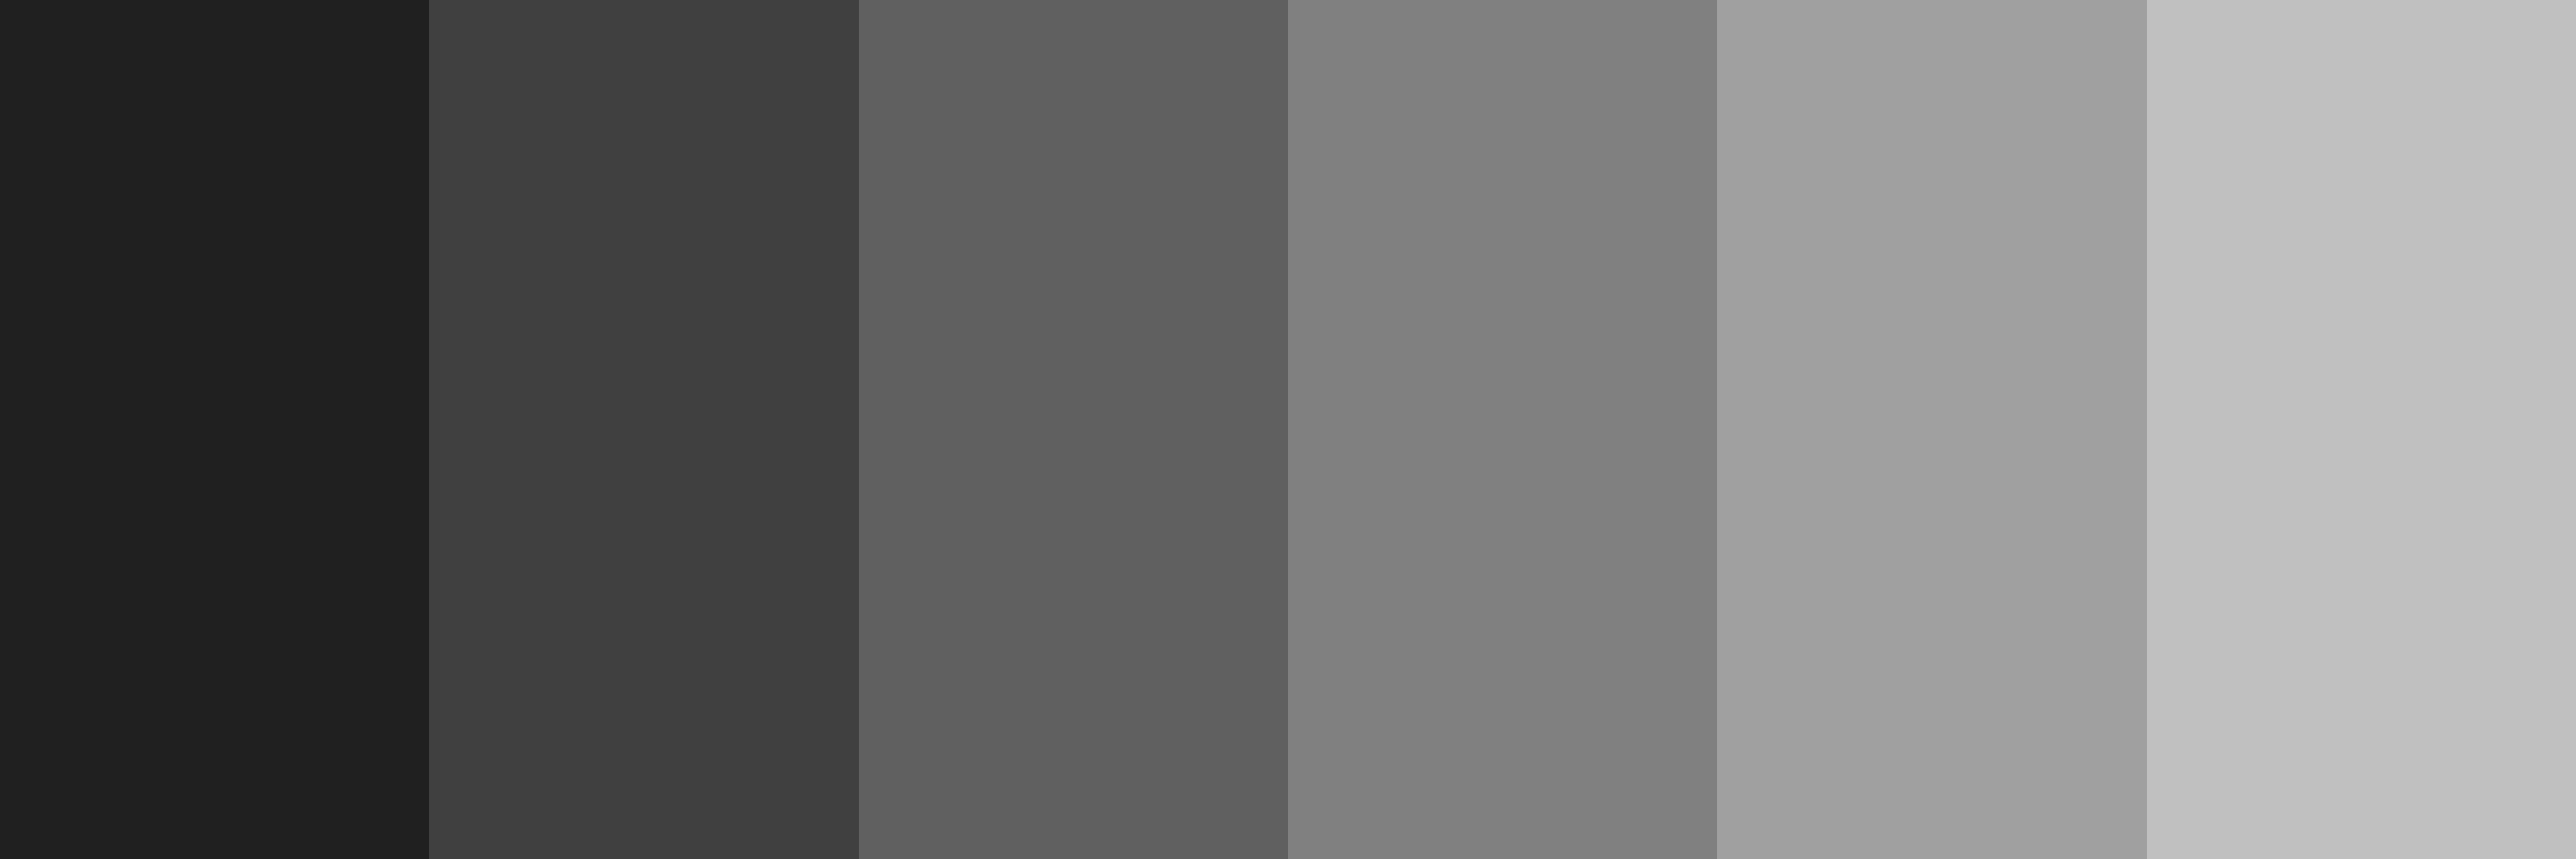

In [151]:
file = 'images/gray_bands.tif'
img  = Image.open(file)
print('(ancho, alto) =', img.size)
display(img)

In [152]:
#img = img.resize(size =(1440,480))
#Si no hago la imagen más pequeña, no es posible aplicar Prewitt.

### Apartado 2) Detectar y representar los bordes con un operador de gradiente.

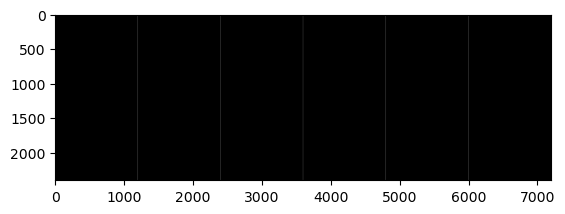

In [155]:
#Operador de gradiente Prewitt
gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

#plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

#Operador de gradiente Sobel
plt.imshow(sobel(img),cmap='gray')

### Apartado 3) Detectar y representar los bordes con el operador de laplaciana

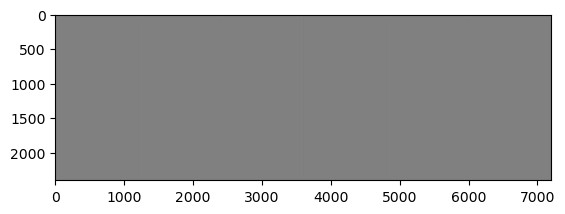

In [156]:
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

### Apartado 4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes.

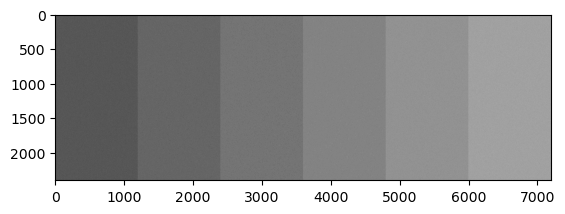

In [157]:
desvtipica = 0.2
img = img + np.random.normal(0.0, desvtipica, img.shape)
plt.imshow(img, cmap='gray')

### Apartado 5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado.

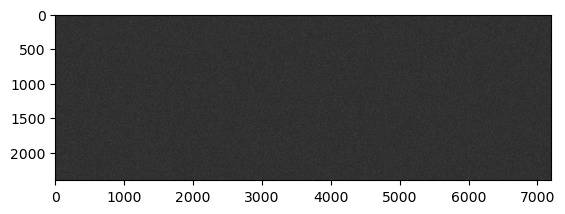

In [158]:
#Operador de gradiente
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

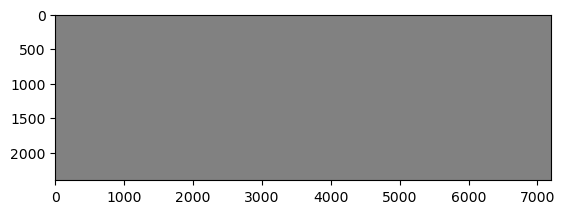

In [159]:
#Operador de laplaciana
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

Teniendo ruido la imagen, no ha sido posible detectar los bordes, ni con operador de gradiente, ni con operador de laplaciana.

### Apartado 6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado.

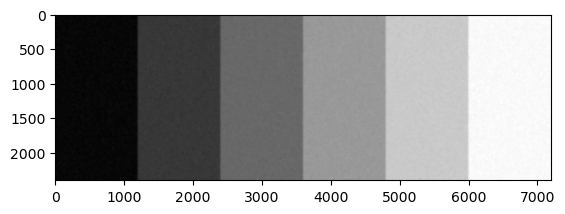

In [160]:
img = gaussian_filter(img, 10)
plt.imshow(img, cmap='gray')

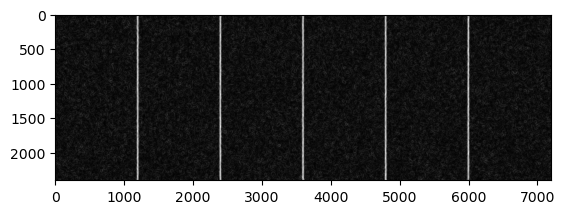

In [161]:
img_gx = convolve(img, gx)
img_gy = convolve(img, gy)
img_prewitt = np.sqrt(img_gx**2 + img_gy**2)

plt.imshow(img_prewitt/img_prewitt.max(), cmap='gray')

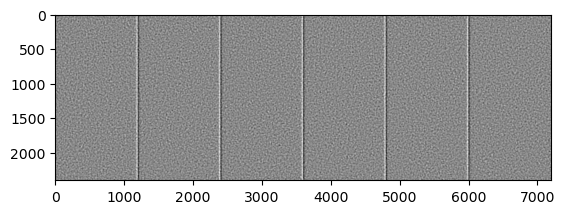

In [162]:
#Operador de laplaciana
img = np.array(img, dtype='float')
img = img/img.max()
img_lpl = laplace(img)
plt.imshow(img_lpl, cmap='gray')

Ahora sí detecta los bordes, pero dentro de las franjas también detecta parte del ruido

### Apartado 7) La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales ("building.tif" y "head_CT.tif"). Discutir el resultado y los parámetros empleados.

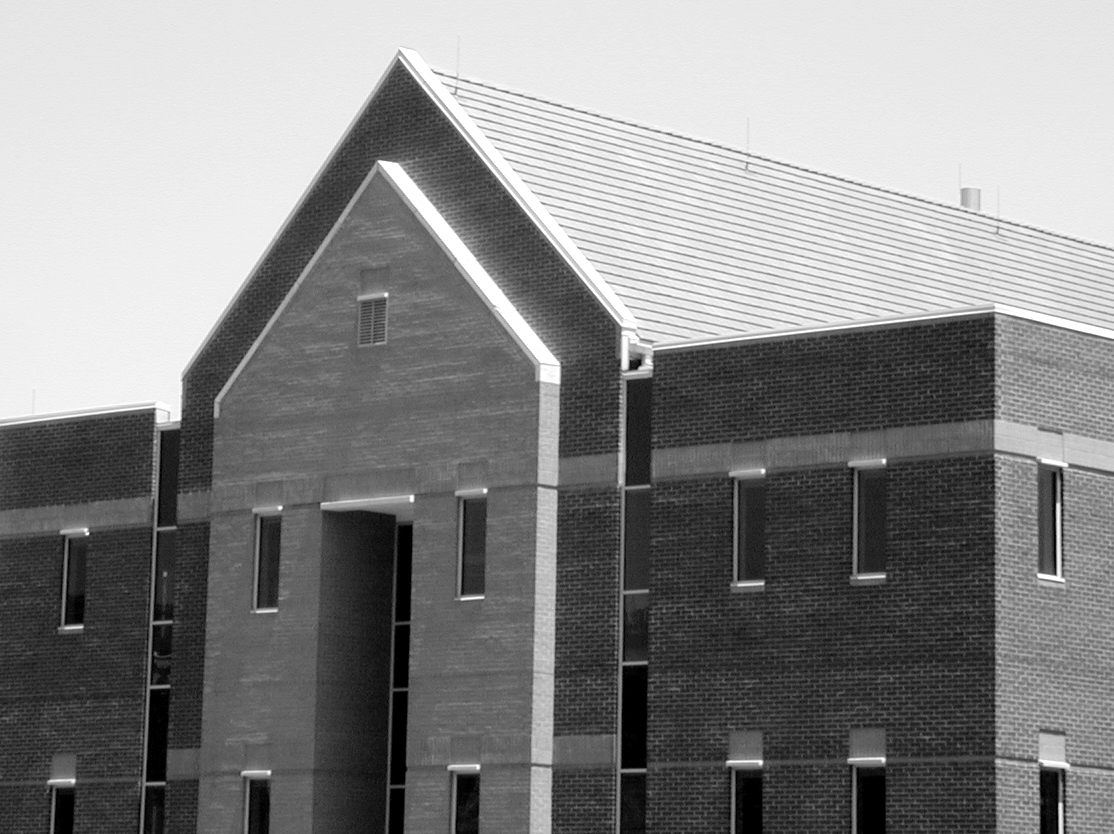

In [168]:
file = 'images/building.tif'
img  = Image.open(file)
display(img)

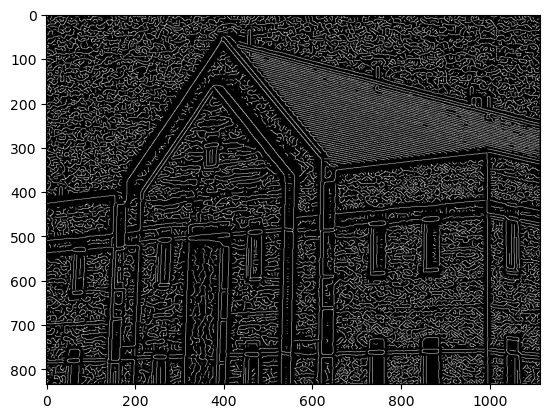

In [171]:
img = np.array(img, dtype='float')
edges = feature.canny(img, sigma=3)
plt.imshow(edges, cmap='gray')

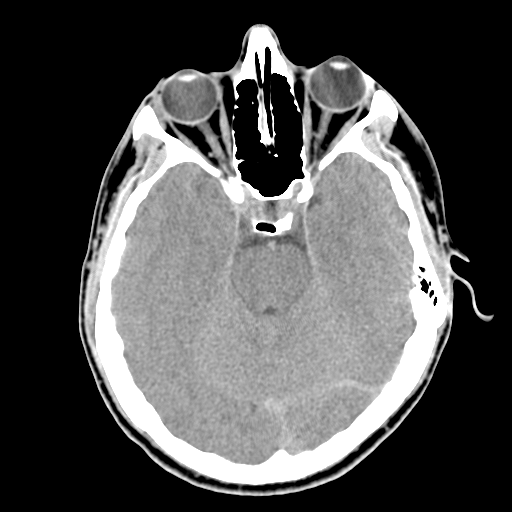

In [172]:
file = 'images/head_CT.tif'
img  = Image.open(file)
display(img)

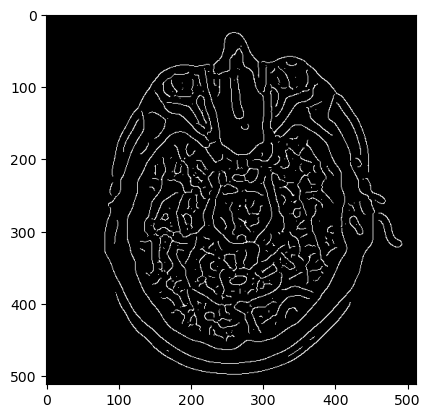

In [173]:
img = np.array(img, dtype='float')
edges = feature.canny(img, sigma = 5)
plt.imshow(edges, cmap='gray')